## Clustering jerárquico y dendogramas
Notaciones
* X dataset(array n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las úniones
* K número de clusters


In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

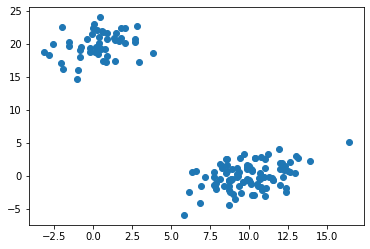

In [6]:
## determinamos la semilla
from numpy import size


np.random.seed(4711)
## creamos números aleatorios de una distribución multivariate normal
#multivariate_normal, es para crear datos distribuidos para en n dimensiones en este caso sería
# en tres dimensiones, el primer caso es una desviacion multivariada, con 
## desviacion mutivariante, esta en torno al punto 10 con una desviacion de entre el punto 3 puntos
# en el eje x, y 4 en el eje y 
a=np.random.multivariate_normal([10,0],[[3,1],[1,4]], size=[100,])
b=np.random.multivariate_normal([0,20], [[3,1],[1,4]], size=[50,])
X=np.concatenate((a,b))
plt.scatter(X[:, 0], X[:,1])

In [37]:
## creamos los clusters con el metodo ward
Z=linkage(X, "ward")

In [35]:
# importamos una librería para poder normalizar los datos
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [40]:
## pasamos la matriz de enlace y la matriz original de los datos
## es para la normalizacion de datos
c, coph_dist=cophenet(Z, pdist(X))
## un 98% de conservación de las distancias originales
c

0.9800148387574268

In [42]:
len(Z)

149

In [43]:
#Z contiene las posiciones de los cluster, cuando sale la posición excediendo el tamaño significa
# que está usando un dataset creado nuevo
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [61]:
pr=Z[:5]

In [63]:
pr[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [64]:
pr[pr[0]]

IndexError: arrays used as indices must be of integer (or boolean) type

In [54]:
len(X), len(Z), Z.shape

(150, 149, (149, 4))

In [45]:
Z[152-len(X)]

array([33.        , 68.        ,  0.07106779,  2.        ])

In [66]:
Z[[33,68,62]]

array([[ 90.        , 181.        ,   0.33976372,   3.        ],
       [159.        , 193.        ,   0.67664987,   6.        ],
       [116.        , 136.        ,   0.59150595,   2.        ]])

In [50]:
Z[[33,62,68]]

array([[ 90.        , 181.        ,   0.33976372,   3.        ],
       [116.        , 136.        ,   0.59150595,   2.        ],
       [159.        , 193.        ,   0.67664987,   6.        ]])

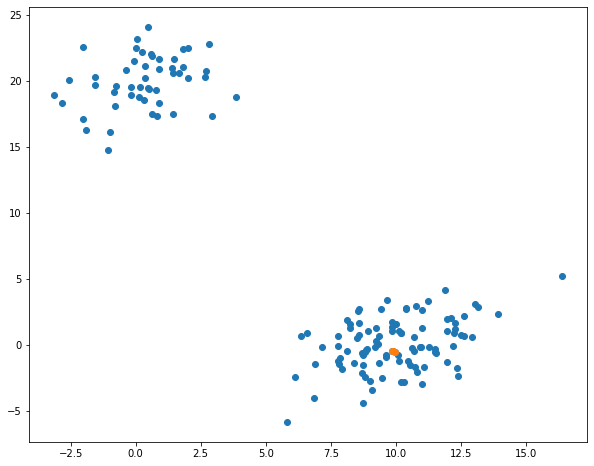

In [81]:
idx=[33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idx, 0], X[idx, 1]) 

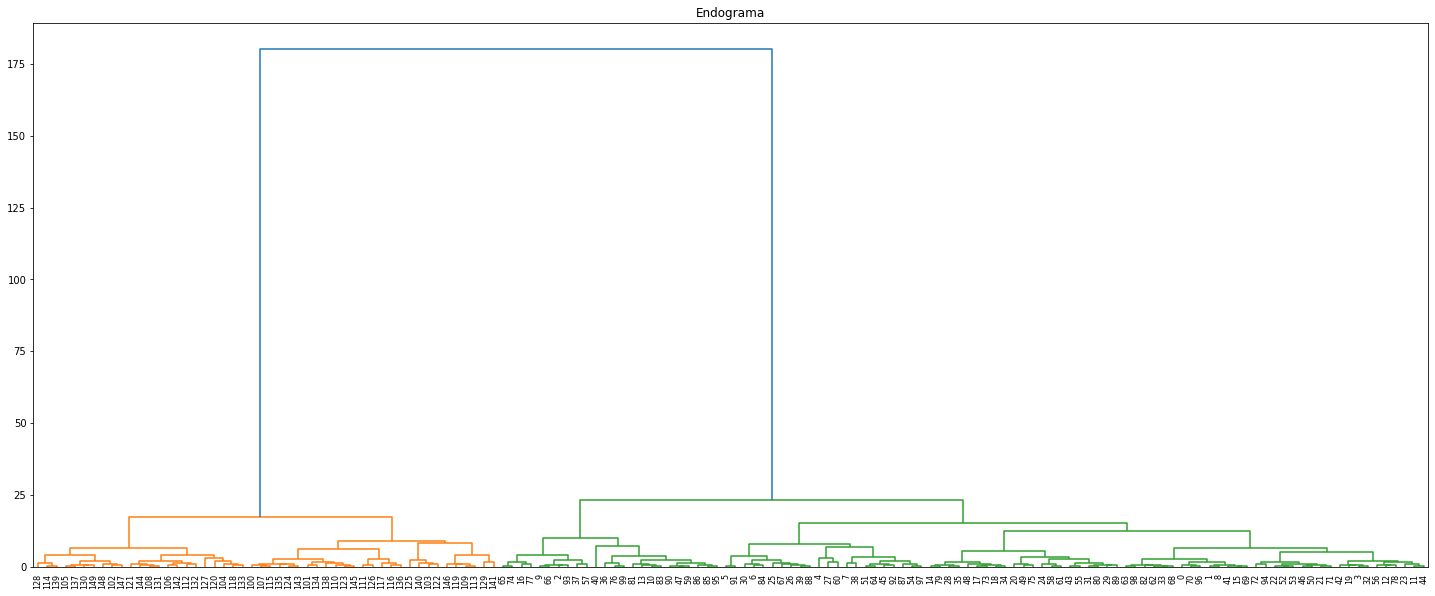

In [83]:
## endograama
plt.figure(figsize=(25,10))
plt.title("Endograma")
dendrogram(Z, leaf_font_size=8.0)
plt.show()

In [84]:
## Endograma la linéa entre más alta se encuentre es por que tardo demasiado en unir los clusters
## por lo tanto el ultimo se encuentra a 175 unión de clusters

In [88]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])